pip install --upgrade numpy

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from xgboost import XGBRegressor
from math import sqrt

In [4]:
# Load your two datasets
normal_data = pd.read_csv(r"C:\Users\ss\OneDrive\Desktop\Msc Project\Python Code\Normal_sales_data_with_features_final.csv")
promo_data = pd.read_csv(r"C:\Users\ss\OneDrive\Desktop\Msc Project\Python Code\Promo_sales_data_with_features.csv")

# Define your feature columns (excluding target)
feature_columns = [col for col in normal_data.columns if col not in ['DATE', 'TOTAL SALES']]  # Adjust if other irrelevant columns exist
target = 'TOTAL SALES'

In [5]:
normal_data

,DATE,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES,...,SALES_LAG_6,SALES_ROLLING_MEAN_3,TYPE_BEER,TYPE_KEGS,TYPE_LIQUOR,TYPE_NON-ALCOHOL,TYPE_REF,TYPE_STR_SUPPLIES,TYPE_WINE,SUPPLIER_ENCODED
0,2017-06-01,2017,6,MONSIEUR TOUTON SELECTION,359696,TRE FILI P/GRIGIO ORGANIC - 750ML,0.00,0.0,1.0,1.00,...,NaN,NaN,0,0,0,0,0,0,1,217
1,2017-06-01,2017,6,A VINTNERS SELECTIONS,438804,LA CANA ALBARINO - 750ML,0.16,0.0,1.0,1.16,...,NaN,NaN,0,0,0,0,0,0,1,3
2,2017-06-01,2017,6,USA WINE IMPORTS,438847,BOUKE RED - 750ML,0.08,0.0,0.0,0.08,...,NaN,NaN,0,0,0,0,0,0,1,357
3,2017-06-01,2017,6,QUINTESSENTIAL LLC,438863,GUSTAVE LORENTZ RES RIES - 750ML,0.24,0.0,0.0,0.24,...,NaN,NaN,0,0,0,0,0,0,1,263
4,2017-06-01,2017,6,REPUBLIC NATIONAL DISTRIBUTING CO,43893,FINEST CALL GRENADINE - 1L,0.00,0.0,2.0,2.00,...,NaN,NaN,0,0,0,1,0,0,0,271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234140,2020-09-01,2020,9,OPICI FAMILY DISTRIBUTING OF MD,321724,BROTTE LE GRIVELIERE CDR - 750ML,0.00,0.0,4.0,4.00,...,2.50,3.000000,0,0,0,0,0,0,1,238
234141,2020-09-01,2020,9,BACCHUS IMPORTERS LTD,32174,CITADELLE GIN - 750ML,3.89,5.0,0.0,3.89,...,5.38,3.273333,0,0,1,0,0,0,0,27
234142,2020-09-01,2020,9,"THE COUNTRY VINTNER, LLC DBA WINEBOW",321742,GROS NORE BANDOL RGE - 750ML,0.00,0.0,1.0,1.00,...,NaN,1.000000,0,0,0,0,0,0,1,330
234143,2020-09-01,2020,9,LAIRD AND COMPANY,70478,LAZZARONI SAMBUCA - 750ML,0.68,0.0,0.0,0.68,...,1.36,0.510000,0,0,1,0,0,0,0,184


In [6]:
normal_data.dtypes

DATE                     object
YEAR                      int64
MONTH                     int64
SUPPLIER                 object
ITEM CODE                object
ITEM DESCRIPTION         object
RETAIL SALES            float64
RETAIL TRANSFERS        float64
WAREHOUSE SALES         float64
TOTAL SALES             float64
QUARTER                   int64
day_of_week               int64
week_of_year              int64
SALES_LAG_1             float64
SALES_LAG_3             float64
SALES_LAG_6             float64
SALES_ROLLING_MEAN_3    float64
TYPE_BEER                 int64
TYPE_KEGS                 int64
TYPE_LIQUOR               int64
TYPE_NON-ALCOHOL          int64
TYPE_REF                  int64
TYPE_STR_SUPPLIES         int64
TYPE_WINE                 int64
SUPPLIER_ENCODED          int64
dtype: object

In [7]:
normal_data.nunique()

DATE                       24
YEAR                        4
MONTH                      12
SUPPLIER                  392
ITEM CODE               45869
ITEM DESCRIPTION        32430
RETAIL SALES             1162
RETAIL TRANSFERS          466
WAREHOUSE SALES           118
TOTAL SALES              1288
QUARTER                     4
day_of_week                 7
week_of_year               15
SALES_LAG_1              1288
SALES_LAG_3              1286
SALES_LAG_6              1285
SALES_ROLLING_MEAN_3     8286
TYPE_BEER                   2
TYPE_KEGS                   2
TYPE_LIQUOR                 2
TYPE_NON-ALCOHOL            2
TYPE_REF                    2
TYPE_STR_SUPPLIES           2
TYPE_WINE                   2
SUPPLIER_ENCODED          392
dtype: int64

# Normal Sales XGBoost Modelling


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Identify categorical columns in Normal dataset
normal_categorical_cols = normal_data.select_dtypes(include=['object']).columns

# Encode Normal dataset
for col in normal_categorical_cols:
    le = LabelEncoder()
    normal_data[col] = le.fit_transform(normal_data[col].astype(str))

# Prepare data
feature_columns = [col for col in normal_data.columns if col not in ['DATE', 'TOTAL SALES']]
X = normal_data[feature_columns]
y = normal_data['TOTAL SALES']

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost
xgb_model_normal = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=7, random_state=42)
xgb_model_normal.fit(X_train_scaled, y_train)
y_pred = xgb_model_normal.predict(X_test_scaled)

# Evaluation
print("Normal Sales XGBoost Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R²: {r2_score(y_test, y_pred)}")


Normal Sales XGBoost Performance:
MAE: 0.006331942098643275
RMSE: 0.024200764793931136
R²: 0.9999214754254203


In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)


{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


# Promo Sales XGboost Modelling

In [10]:
# Identify categorical columns in Promo dataset
promo_categorical_cols = promo_data.select_dtypes(include=['object']).columns

# Encode Promo dataset
for col in promo_categorical_cols:
    le = LabelEncoder()
    promo_data[col] = le.fit_transform(promo_data[col].astype(str))

# Prepare data
feature_columns_promo = [col for col in promo_data.columns if col not in ['DATE', 'TOTAL SALES']]
X_promo = promo_data[feature_columns_promo]
y_promo = promo_data['TOTAL SALES']

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(X_promo):
    X_train_promo, X_test_promo = X_promo.iloc[train_idx], X_promo.iloc[test_idx]
    y_train_promo, y_test_promo = y_promo.iloc[train_idx], y_promo.iloc[test_idx]
scaler_promo = MinMaxScaler()
X_train_promo_scaled = scaler_promo.fit_transform(X_train_promo)
X_test_promo_scaled = scaler_promo.transform(X_test_promo)

# Train XGBoost
xgb_model_promo = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model_promo.fit(X_train_promo_scaled, y_train_promo)
y_pred_promo = xgb_model_promo.predict(X_test_promo_scaled)

# Evaluation
print("\nPromo Sales XGBoost Performance:")
print(f"MAE: {mean_absolute_error(y_test_promo, y_pred_promo)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test_promo, y_pred_promo))}")
print(f"R²: {r2_score(y_test_promo, y_pred_promo)}")



Promo Sales XGBoost Performance:
MAE: 21.818391206448776
RMSE: 114.8467563774652
R²: 0.9734410859690281


In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_promo_scaled, y_train_promo)
print(grid_search.best_params_)


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


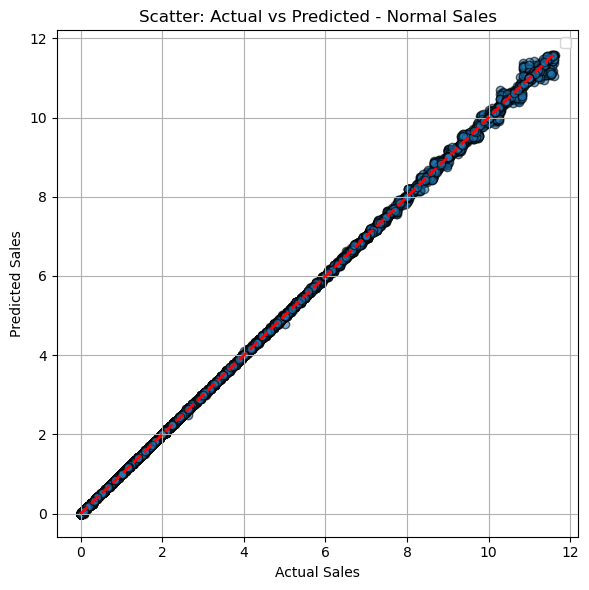

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


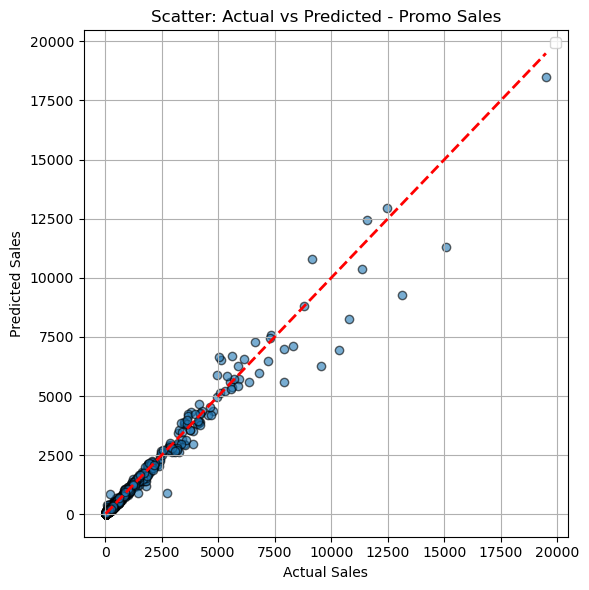

In [12]:
import matplotlib.pyplot as plt

def scatter_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Scatter for Normal Sales
scatter_actual_vs_predicted(y_test, y_pred, "Scatter: Actual vs Predicted - Normal Sales")

# Scatter for Promo Sales
scatter_actual_vs_predicted(y_test_promo, y_pred_promo, "Scatter: Actual vs Predicted - Promo Sales")


In [13]:
promo_vs_normal = pd.concat([promo_data.assign(Promo=1), normal_data.assign(Promo=0)])
X_promo_analysis = promo_vs_normal.drop(columns=['TOTAL SALES', 'DATE'])
y_promo_analysis = promo_vs_normal['TOTAL SALES']

X_train_promo, X_test_promo, y_train_promo, y_test_promo = train_test_split(
    X_promo_analysis, y_promo_analysis, test_size=0.2, shuffle=False)

model_promo = XGBRegressor().fit(X_train_promo, y_train_promo)
print("Promo Model R²:", model_promo.score(X_test_promo, y_test_promo))


Promo Model R²: 0.9810520623598897


# Multistep Forecasting for Normal Sale

In [14]:
# Sort data by ITEM CODE and DATE
normal_data.sort_values(by=['ITEM CODE', 'DATE'], inplace=True)

# Create multi-step targets
normal_data['SALES_t+1'] = normal_data.groupby('ITEM CODE')['TOTAL SALES'].shift(-1)
normal_data['SALES_t+2'] = normal_data.groupby('ITEM CODE')['TOTAL SALES'].shift(-2)
normal_data['SALES_t+3'] = normal_data.groupby('ITEM CODE')['TOTAL SALES'].shift(-3)

# Drop rows with NaN targets (the last few rows per product)
multi_step_data = normal_data.dropna(subset=['SALES_t+1', 'SALES_t+2', 'SALES_t+3'])


In [15]:
# Define features (exclude DATE, original TOTAL SALES, and new targets)
X = multi_step_data.drop(columns=['DATE', 'TOTAL SALES', 'SALES_t+1', 'SALES_t+2', 'SALES_t+3'])

# Define multi-step targets clearly
y = multi_step_data[['SALES_t+1', 'SALES_t+2', 'SALES_t+3']]


In [16]:
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


In [17]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

model = MultiOutputRegressor(XGBRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# Predict multiple steps simultaneously
y_pred_norm = model.predict(X_test)


In [18]:
y_pred_norm.shape

(31623, 3)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

for step in range(y_pred_norm.shape[1]):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, step], y_pred_norm[:, step]))
    mae = mean_absolute_error(y_test.iloc[:, step], y_pred_norm[:, step])
    print(f"Step {step+1} Forecast — RMSE: {rmse}, MAE: {mae}")


Step 1 Forecast — RMSE: 1.8423787234490812, MAE: 1.255867833977468
Step 2 Forecast — RMSE: 1.9607290808026798, MAE: 1.3530318860307
Step 3 Forecast — RMSE: 2.1234222239397442, MAE: 1.4805684361272384


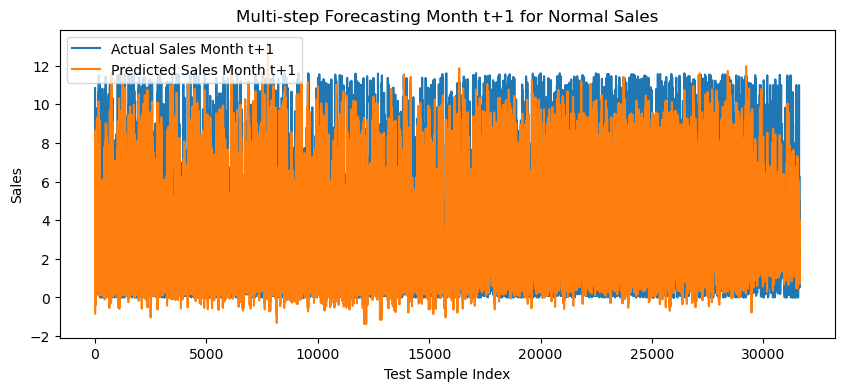

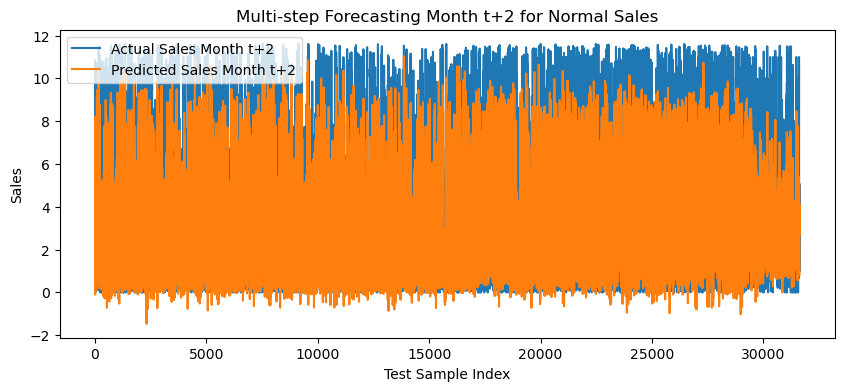

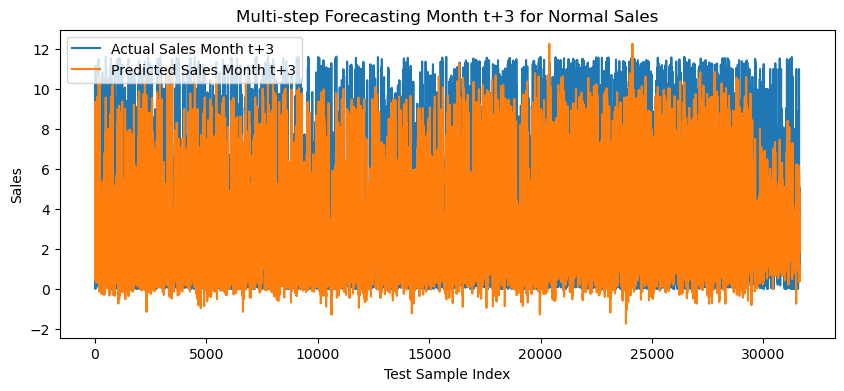

In [20]:
import matplotlib.pyplot as plt

# Plot predictions vs actual for each future step
for step in range(y_pred_norm.shape[1]):
    plt.figure(figsize=(10,4))
    plt.plot(y_test.iloc[:, step].values, label=f'Actual Sales Month t+{step+1}')
    plt.plot(y_pred_norm[:, step], label=f'Predicted Sales Month t+{step+1}')
    plt.title(f'Multi-step Forecasting Month t+{step+1} for Normal Sales')
    plt.xlabel('Test Sample Index')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()


# Multistep forecasting for Promo Sales

In [21]:


# Sort data by ITEM CODE and DATE
promo_data.sort_values(by=['ITEM CODE', 'DATE'], inplace=True)

# Create multi-step targets
promo_data['SALES_t+1'] = promo_data.groupby('ITEM CODE')['TOTAL SALES'].shift(-1)
promo_data['SALES_t+2'] = promo_data.groupby('ITEM CODE')['TOTAL SALES'].shift(-2)
promo_data['SALES_t+3'] = promo_data.groupby('ITEM CODE')['TOTAL SALES'].shift(-3)

# Drop rows with NaN targets (the last few rows per product)
multi_step_data = promo_data.dropna(subset=['SALES_t+1', 'SALES_t+2', 'SALES_t+3'])


In [22]:
# Define features (exclude DATE, original TOTAL SALES, and new targets)
X = multi_step_data.drop(columns=['DATE', 'TOTAL SALES', 'SALES_t+1', 'SALES_t+2', 'SALES_t+3'])

# Define multi-step targets clearly
y = multi_step_data[['SALES_t+1', 'SALES_t+2', 'SALES_t+3']]


In [23]:
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


In [24]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

model = MultiOutputRegressor(XGBRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# Predict multiple steps simultaneously
y_pred_promo = model.predict(X_test)


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

for step in range(y_pred_promo.shape[1]):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, step], y_pred_promo[:, step]))
    mae = mean_absolute_error(y_test.iloc[:, step], y_pred_promo[:, step])
    print(f"Step {step+1} Forecast — RMSE: {rmse}, MAE: {mae}")


Step 1 Forecast — RMSE: 556.3283616085831, MAE: 107.93569883168539
Step 2 Forecast — RMSE: 470.0180311202889, MAE: 110.47617333281144
Step 3 Forecast — RMSE: 642.2859220194327, MAE: 130.0617112993434


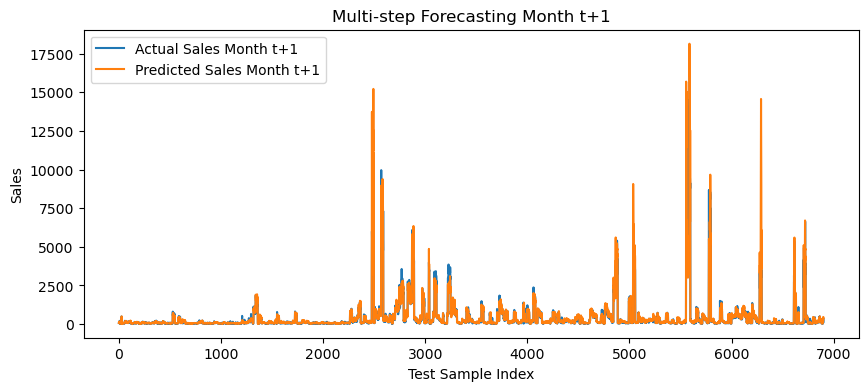

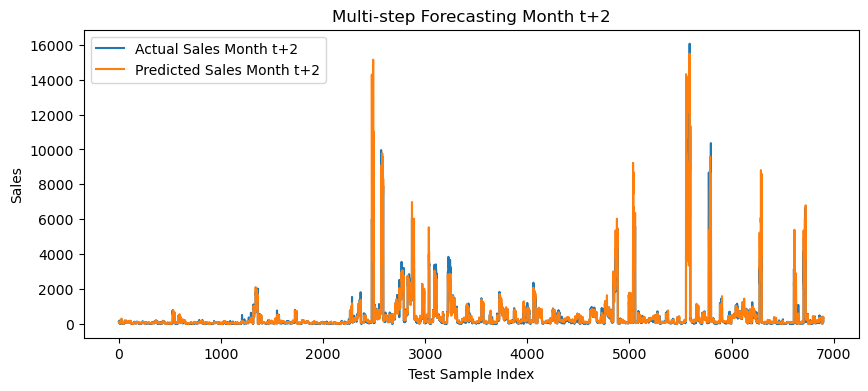

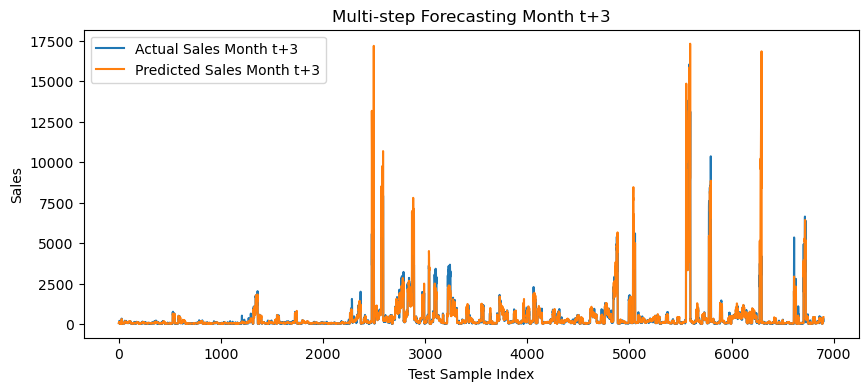

In [26]:
import matplotlib.pyplot as plt

# Plot predictions vs actual for each future step
for step in range(y_pred_promo.shape[1]):
    plt.figure(figsize=(10,4))
    plt.plot(y_test.iloc[:, step].values, label=f'Actual Sales Month t+{step+1}')
    plt.plot(y_pred_promo[:, step], label=f'Predicted Sales Month t+{step+1}')
    plt.title(f'Multi-step Forecasting Month t+{step+1}')
    plt.xlabel('Test Sample Index')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()


In [27]:
normal_forecast = pd.DataFrame(y_pred_norm, columns=['Month1', 'Month2', 'Month3'])
promo_forecast = pd.DataFrame(y_pred_promo, columns=['Month1', 'Month2', 'Month3'])
forecast_comparison = normal_forecast.copy()


In [28]:
forecast_comparison

,Month1,Month2,Month3
0,5.985103,8.052943,8.780406
1,7.256254,8.204696,7.831571
2,8.203631,7.322638,9.358452
3,8.582996,8.006500,9.291234
4,-0.845909,0.098528,0.608619
...,...,...,...
31618,1.800656,1.482318,0.933681
31619,1.089781,1.231050,0.357206
31620,2.222018,1.669878,0.686382
31621,0.709416,1.544987,0.553281


In [29]:
# Add Promo forecasts as new columns
forecast_comparison['Promo_M1'] = promo_forecast['Month1']
forecast_comparison['Promo_M2'] = promo_forecast['Month2']
forecast_comparison['Promo_M3'] = promo_forecast['Month3']

# Absolute difference
forecast_comparison['Diff_M1'] = forecast_comparison['Promo_M1'] - forecast_comparison['Month1']
forecast_comparison['Diff_M2'] = forecast_comparison['Promo_M2'] - forecast_comparison['Month2']
forecast_comparison['Diff_M3'] = forecast_comparison['Promo_M3'] - forecast_comparison['Month3']

# Percentage difference
forecast_comparison['Pct_Diff_M1'] = (forecast_comparison['Diff_M1'] / forecast_comparison['Month1']) * 100
forecast_comparison['Pct_Diff_M2'] = (forecast_comparison['Diff_M2'] / forecast_comparison['Month2']) * 100
forecast_comparison['Pct_Diff_M3'] = (forecast_comparison['Diff_M3'] / forecast_comparison['Month3']) * 100

forecast_comparison.head()

,Month1,Month2,Month3,Promo_M1,Promo_M2,Promo_M3,Diff_M1,Diff_M2,Diff_M3,Pct_Diff_M1,Pct_Diff_M2,Pct_Diff_M3
0,5.985103,8.052943,8.780406,75.037758,123.590347,57.468109,69.052658,115.537407,48.687702,1153.742188,1434.722656,554.504028
1,7.256254,8.204696,7.831571,114.381119,77.676453,110.120270,107.124863,69.471756,102.288696,1476.310913,846.731689,1306.107056
2,8.203631,7.322638,9.358452,68.181389,113.373871,69.171104,59.977757,106.051231,59.812653,731.112305,1448.265381,639.129761
3,8.582996,8.006500,9.291234,108.315880,86.304230,113.427025,99.732880,78.297729,104.135788,1161.982056,977.927002,1120.796143
4,-0.845909,0.098528,0.608619,81.330948,120.186272,86.740952,82.176857,120.087746,86.132332,-9714.618164,121882.445312,14152.096680


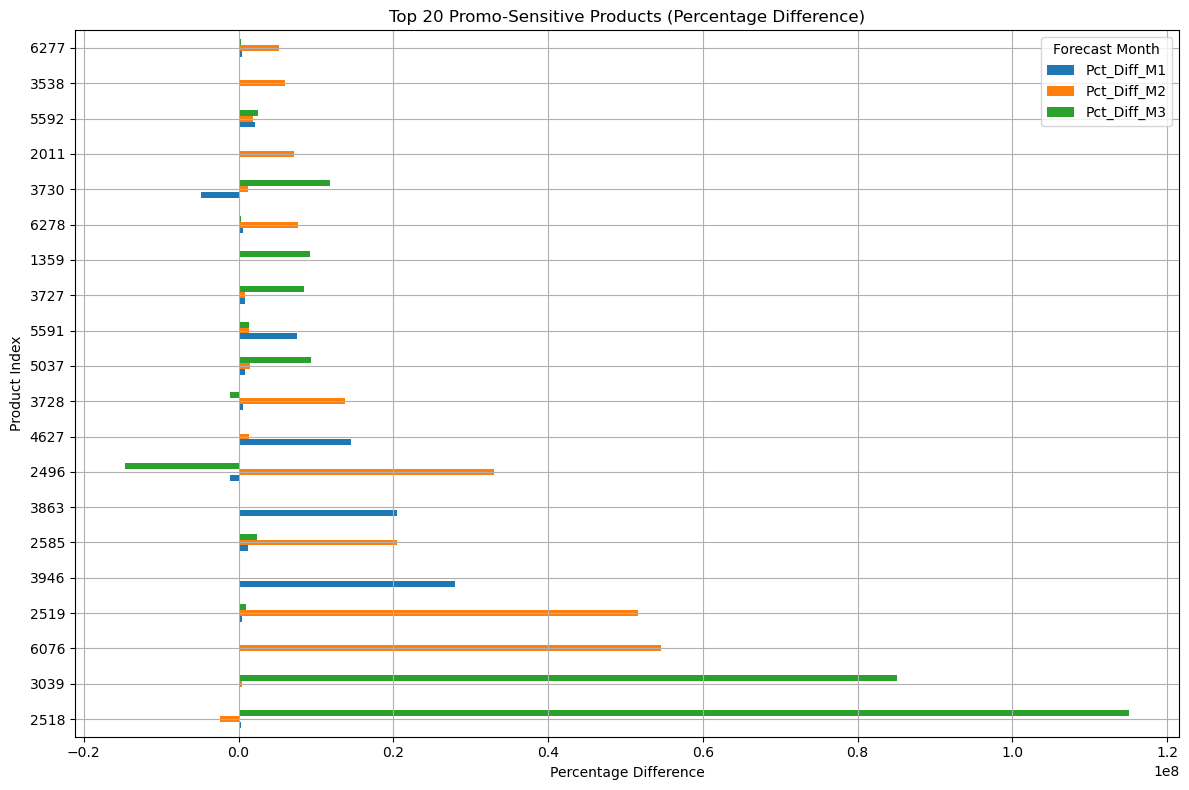

In [30]:
# Create a column for average percentage difference
forecast_comparison['Avg_Pct_Diff'] = forecast_comparison[['Pct_Diff_M1', 'Pct_Diff_M2', 'Pct_Diff_M3']].mean(axis=1)

# Sort and take top 20 most promo-sensitive products
top_diff = forecast_comparison.sort_values(by='Avg_Pct_Diff', ascending=False).head(20)

top_diff[['Pct_Diff_M1', 'Pct_Diff_M2', 'Pct_Diff_M3']].plot(kind='barh', figsize=(12, 8))
plt.title('Top 20 Promo-Sensitive Products (Percentage Difference)')
plt.xlabel('Percentage Difference')
plt.ylabel('Product Index')
plt.legend(title='Forecast Month')
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
conditions = [
    (forecast_comparison[['Pct_Diff_M1','Pct_Diff_M2','Pct_Diff_M3']].mean(axis=1) >= 30),
    (forecast_comparison[['Pct_Diff_M1','Pct_Diff_M2','Pct_Diff_M3']].mean(axis=1) >= 10),
    (forecast_comparison[['Pct_Diff_M1','Pct_Diff_M2','Pct_Diff_M3']].mean(axis=1) < 10),
]

choices = ['High', 'Moderate', 'Low']
forecast_comparison['Promo_Sensitivity'] = np.select(conditions, choices, default='Low')


In [32]:
forecast_comparison

,Month1,Month2,Month3,Promo_M1,Promo_M2,Promo_M3,Diff_M1,Diff_M2,Diff_M3,Pct_Diff_M1,Pct_Diff_M2,Pct_Diff_M3,Avg_Pct_Diff,Promo_Sensitivity
0,5.985103,8.052943,8.780406,75.037758,123.590347,57.468109,69.052658,115.537407,48.687702,1153.742188,1434.722656,554.504028,1047.656250,High
1,7.256254,8.204696,7.831571,114.381119,77.676453,110.120270,107.124863,69.471756,102.288696,1476.310913,846.731689,1306.107056,1209.716431,High
2,8.203631,7.322638,9.358452,68.181389,113.373871,69.171104,59.977757,106.051231,59.812653,731.112305,1448.265381,639.129761,939.502441,High
3,8.582996,8.006500,9.291234,108.315880,86.304230,113.427025,99.732880,78.297729,104.135788,1161.982056,977.927002,1120.796143,1086.901733,High
4,-0.845909,0.098528,0.608619,81.330948,120.186272,86.740952,82.176857,120.087746,86.132332,-9714.618164,121882.445312,14152.096680,42106.640625,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31618,1.800656,1.482318,0.933681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
31619,1.089781,1.231050,0.357206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
31620,2.222018,1.669878,0.686382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
31621,0.709416,1.544987,0.553281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low


In [33]:
from xgboost import XGBRegressor
import pandas as pd
import numpy as np

item_multi_step_preds = []

# Loop over each ITEM CODE
for item in normal_data['ITEM CODE'].unique():
    item_df = normal_data[normal_data['ITEM CODE'] == item].copy()

    # Ensure data is sorted by date
    item_df.sort_values(by='DATE', inplace=True)

    # Skip if not enough data
    if len(item_df) < 6:
        continue

    # Define features
    features = ['SALES_LAG_1', 'SALES_LAG_3', 'SALES_ROLLING_MEAN_3', 'MONTH']
    item_df = item_df.dropna(subset=features + ['TOTAL SALES'])

    if len(item_df) < 5:
        continue

    X = item_df[features]
    y = item_df['TOTAL SALES']

    # Fit model on all but last row
    model = XGBRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Start with the last known values for rolling forecast
    last_known = item_df.iloc[-1:].copy()
    rolling_history = item_df.copy()

    forecasts = []

    for step in range(3):
        # Create features for the next step based on most recent data
        lag_1 = rolling_history['TOTAL SALES'].iloc[-1]
        lag_3 = rolling_history['TOTAL SALES'].iloc[-3:].mean()
        rolling_mean = rolling_history['TOTAL SALES'].iloc[-3:].mean()
        month = (last_known['MONTH'].values[0] + step) % 12 or 12

        pred_input = pd.DataFrame([{
            'SALES_LAG_1': lag_1,
            'SALES_LAG_3': lag_3,
            'SALES_ROLLING_MEAN_3': rolling_mean,
            'MONTH': month
        }])

        # Predict and save forecast
        pred = model.predict(pred_input)[0]
        forecasts.append(pred)

        # Append prediction to rolling history
        new_row = {
            'TOTAL SALES': pred,
            'SALES_LAG_1': lag_1,
            'SALES_LAG_3': lag_3,
            'SALES_ROLLING_MEAN_3': rolling_mean,
            'MONTH': month
        }
        rolling_history = rolling_history.append(new_row, ignore_index=True)

    item_multi_step_preds.append({
        'ITEM CODE': item,
        'Pred_Month1': forecasts[0],
        'Pred_Month2': forecasts[1],
        'Pred_Month3': forecasts[2]
    })

# Convert results to DataFrame
item_forecast_df = pd.DataFrame(item_multi_step_preds)
item_forecast_df.head()


,ITEM CODE,Pred_Month1,Pred_Month2,Pred_Month3
0,3,0.127024,1.367975,1.367975
1,5,3.001728,1.069748,1.000282
2,7,2.000041,2.000041,1.999434
3,8,10.365995,8.000110,8.000110
4,10,2.999580,2.999580,2.999580


In [34]:
# Convert results to DataFrame
item_forecast_df = pd.DataFrame(item_multi_step_preds)
item_forecast_df.head()


,ITEM CODE,Pred_Month1,Pred_Month2,Pred_Month3
0,3,0.127024,1.367975,1.367975
1,5,3.001728,1.069748,1.000282
2,7,2.000041,2.000041,1.999434
3,8,10.365995,8.000110,8.000110
4,10,2.999580,2.999580,2.999580


In [35]:
item_forecast_df.to_csv('item_forecast_df.csv')

In [36]:
# Convert ITEM CODE to string in both DataFrames
item_forecast_df['ITEM CODE'] = item_forecast_df['ITEM CODE'].astype(str)
normal_data['ITEM CODE'] = normal_data['ITEM CODE'].astype(str)



In [37]:
normal_data

,DATE,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES,...,TYPE_KEGS,TYPE_LIQUOR,TYPE_NON-ALCOHOL,TYPE_REF,TYPE_STR_SUPPLIES,TYPE_WINE,SUPPLIER_ENCODED,SALES_t+1,SALES_t+2,SALES_t+3
16639,1,2017,7,269,0,22953,0.17,0.0,0.0,0.17,...,0,1,0,0,0,0,269,NaN,NaN,NaN
129487,12,2019,4,75,1,17619,0.00,0.0,1.0,1.00,...,0,0,0,0,0,1,75,1.0,1.0,1.0
134195,13,2019,5,75,1,17619,0.00,0.0,1.0,1.00,...,0,0,0,0,0,1,75,1.0,1.0,NaN
185154,18,2019,10,75,1,17619,0.00,0.0,1.0,1.00,...,0,0,0,0,0,1,75,1.0,NaN,NaN
196341,19,2019,11,75,1,17619,0.00,0.0,1.0,1.00,...,0,0,0,0,0,1,75,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97810,9,2019,1,360,31937,31007,0.50,0.0,0.0,0.50,...,0,0,0,0,0,0,360,NaN,NaN,NaN
228146,23,2020,9,73,31938,10612,2.25,0.0,0.0,2.25,...,0,0,0,0,0,0,73,NaN,NaN,NaN
68932,6,2017,12,43,31939,25720,0.00,0.0,8.0,8.00,...,1,0,0,0,0,0,43,NaN,NaN,NaN
116818,11,2019,3,43,31940,25764,0.00,0.0,5.0,5.00,...,0,0,0,0,0,0,43,2.5,NaN,NaN


In [38]:
normal_data_pred = pd.read_csv(r"C:\Users\ss\OneDrive\Desktop\Msc Project\Python Code\Normal_sales_data_with_features_final.csv")


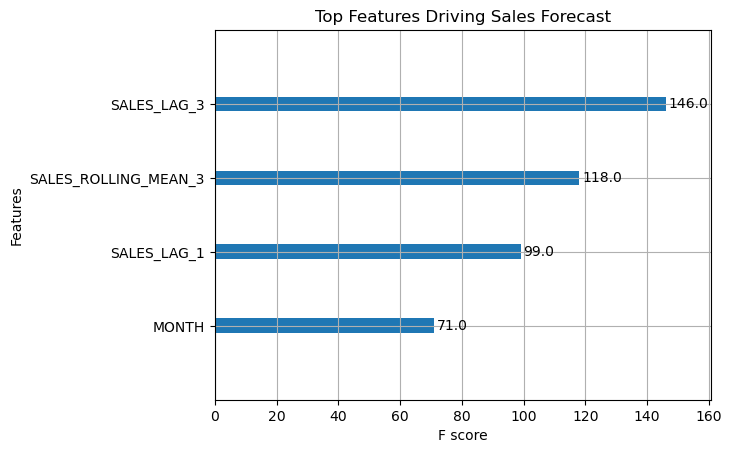

In [39]:
from xgboost import plot_importance
plot_importance(model, max_num_features=10)
plt.title('Top Features Driving Sales Forecast')
plt.show()


In [40]:
# Step 2: Clean data (remove rows without descriptions)
item_forecast_df = item_forecast_df.dropna(subset=['ITEM DESCRIPTION'])

# Step 3: Simulate Promo Uplift % (replace this with actual promo uplift if available)
np.random.seed(42)  # for reproducibility
item_forecast_df['Promo_Uplift_%'] = np.random.randint(5, 45, size=len(item_forecast_df))

# Step 4: Define Sensitivity Categories
item_forecast_df['Sensitivity'] = pd.cut(
    item_forecast_df['Promo_Uplift_%'],
    bins=[-np.inf, 9, 29, np.inf],
    labels=['Low', 'Moderate', 'High']
)

# Step 5: Define Recommended Actions
def action_strategy(row):
    if row['Sensitivity'] == 'High':
        return 'Promote monthly or during key events'
    elif row['Sensitivity'] == 'Moderate':
        return 'Use selective/seasonal promotions'
    else:
        return 'Keep stocked, no frequent promotion'

item_forecast_df['Action'] = item_forecast_df.apply(action_strategy, axis=1)

# Step 6: Create final table
final_recommendation_table = item_forecast_df[[
    'ITEM CODE', 'ITEM DESCRIPTION',
    'Pred_Month1', 'Pred_Month2', 'Pred_Month3',
    'Promo_Uplift_%', 'Sensitivity', 'Action'
]]

final_recommendation_table

KeyError: ['ITEM DESCRIPTION']

In [ ]:
final_recommendation_table

In [ ]:
final_recommendation_table['Sensitivity'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), colors=['lightgreen', 'gold', 'salmon']
)
plt.title('Distribution of Products by Promotion Sensitivity')
plt.ylabel('')
plt.show()


In [ ]:
# Stacked bar for top 5 items
top_sales = final_recommendation_table.sort_values(by='Pred_Month1', ascending=False).head(5)

top_sales[['ITEM DESCRIPTION', 'Pred_Month1', 'Pred_Month2', 'Pred_Month3']].set_index('ITEM DESCRIPTION').plot(
    kind='bar', stacked=True, figsize=(10, 6)
)
plt.title('Quarterly Sales Forecast for Top 5 Products')
plt.ylabel('Forecasted Sales Volume')
plt.xlabel('Item Description')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
